# Presentation graphs and tests

In [1]:
from dbanalysis import stop_tools
import pandas as pd

In [99]:
df=stop_tools.random_stop_data()

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,12490.0,1.926324e+05,1.449744e+05,1.600000e+01,5.979225e+04,1.756715e+05,2.921365e+05,5.198560e+05
tripid,12490.0,4.517913e+06,2.728470e+05,4.082092e+06,4.381997e+06,4.517154e+06,4.595517e+06,5.116825e+06
plannedtime_arr_from,12490.0,5.119583e+04,1.779333e+04,2.040200e+04,3.504700e+04,5.134700e+04,6.521600e+04,8.561300e+04
plannedtime_dep_from,12490.0,5.119583e+04,1.779333e+04,2.040200e+04,3.504700e+04,5.134700e+04,6.521600e+04,8.561300e+04
actualtime_arr_from,12490.0,5.124505e+04,1.781808e+04,2.042500e+04,3.502375e+04,5.146800e+04,6.535950e+04,8.583700e+04
actualtime_dep_from,12490.0,5.124957e+04,1.781753e+04,2.042500e+04,3.503200e+04,5.146800e+04,6.535950e+04,8.583700e+04
plannedtime_arr_to,12490.0,5.128667e+04,1.779117e+04,2.045700e+04,3.513400e+04,5.144200e+04,6.532500e+04,8.568800e+04
actualtime_arr_to,12490.0,5.131149e+04,1.781881e+04,2.046700e+04,3.508575e+04,5.154300e+04,6.545600e+04,8.589200e+04
traveltime,12490.0,6.191922e+01,4.064977e+01,3.100000e+01,4.900000e+01,5.500000e+01,6.800000e+01,2.532000e+03
dwelltime,12490.0,4.517214e+00,8.899834e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.430000e+02


In [6]:
df.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'date',
       'hour', 'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb', 'dt'],
      dtype='object')

In [8]:
from sklearn.linear_model import LinearRegression

In [58]:
df=df.sort_values(by=['actualtime_arr_from'])

In [59]:
regr = LinearRegression(fit_intercept=True).fit(df[['actualtime_arr_from']],df['traveltime'])

In [13]:
print('hello')

hello


In [14]:
from matplotlib import pyplot as plt

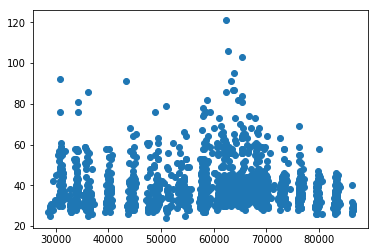

In [44]:
plt.scatter(df['actualtime_arr_from'],df['traveltime'])

In [45]:
import numpy as np
msk = np.random.rand(len(df)) < 0.20
randoms = df[msk]

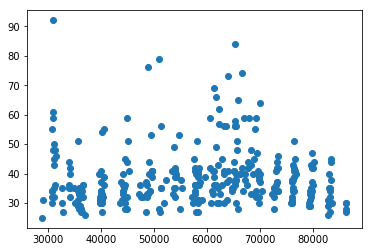

In [46]:
plt.scatter(randoms['actualtime_arr_from'],randoms['traveltime'])

In [61]:
predicts = regr.predict(randoms[['actualtime_arr_from']])

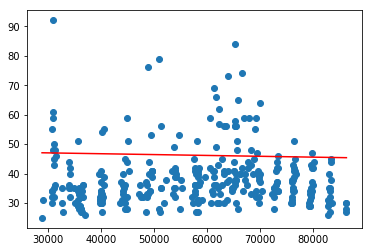

In [62]:
plt.scatter(randoms['actualtime_arr_from'],randoms['traveltime'])
plt.plot (randoms['actualtime_arr_from'],predicts,color='red')
plt.show()

In [131]:
df['act2']=df['actualtime_arr_from']**2
df['act3']=df['actualtime_arr_from']**3

In [68]:
regr = LinearRegression(fit_intercept=True).fit(df[['actualtime_arr_from','act2']],df['traveltime'])

In [69]:
predicts = regr.predict(df[['actualtime_arr_from','act2']])

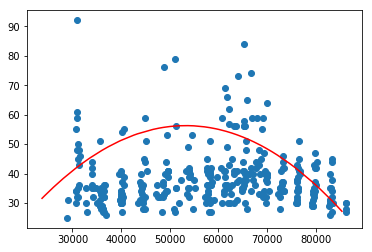

In [70]:
plt.scatter(randoms['actualtime_arr_from'],randoms['traveltime'])
plt.plot (df['actualtime_arr_from'],predicts,color='red')
plt.show()

In [132]:
regr = LinearRegression(fit_intercept=True).fit(df[['actualtime_arr_from','act2','act3']],df['traveltime'])

In [133]:
predicts = regr.predict(df[['actualtime_arr_from','act2','act3']])

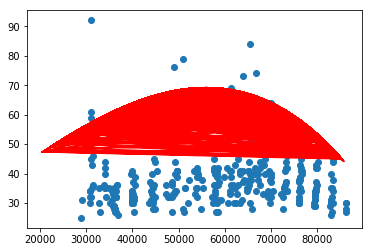

In [134]:
plt.scatter(randoms['actualtime_arr_from'],randoms['traveltime'])
plt.plot (df['actualtime_arr_from'],predicts,color='red')
plt.show()

In [74]:
df.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'date',
       'hour', 'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb', 'dt',
       'act2', 'act3'],
      dtype='object')

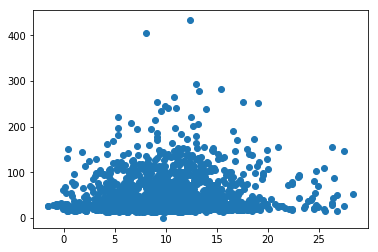

In [96]:
plt.scatter(df['temp'],df['traveltime'])

In [93]:
regr = LinearRegression(fit_intercept=True).fit(df[['temp','temp2']],df['traveltime'])

In [88]:
df['temp2']=df['temp']**2

In [92]:
df=df.sort_values(by='temp')

In [94]:
predicts = regr.predict(df[['temp','temp2']])

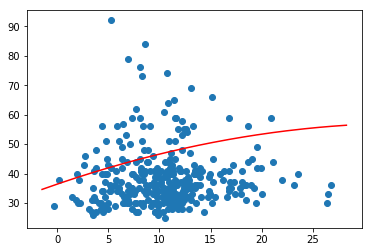

In [95]:
plt.scatter(randoms['temp'],randoms['traveltime'])
plt.plot (df['temp'],predicts,color='red')
plt.show()

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1970.0,3.012935e+04,2.701676e+04,1.100000e+01,7.736500e+03,2.022500e+04,5.121900e+04,9.077100e+04
tripid,1970.0,4.521847e+06,2.823720e+05,4.081003e+06,4.382537e+06,4.513624e+06,4.597763e+06,5.116441e+06
plannedtime_arr_from,1970.0,5.327557e+04,1.875266e+04,2.394300e+04,3.569500e+04,5.389100e+04,6.812600e+04,8.537200e+04
plannedtime_dep_from,1970.0,5.327557e+04,1.875266e+04,2.394300e+04,3.569500e+04,5.389100e+04,6.812600e+04,8.537200e+04
actualtime_arr_from,1970.0,5.333079e+04,1.876110e+04,2.374900e+04,3.581975e+04,5.406100e+04,6.804850e+04,8.543000e+04
actualtime_dep_from,1970.0,5.333310e+04,1.875940e+04,2.374900e+04,3.582100e+04,5.406100e+04,6.805000e+04,8.543000e+04
plannedtime_arr_to,1970.0,5.333367e+04,1.875096e+04,2.398400e+04,3.574500e+04,5.391500e+04,6.818500e+04,8.542600e+04
actualtime_arr_to,1970.0,5.337947e+04,1.875890e+04,2.374900e+04,3.588425e+04,5.411600e+04,6.808150e+04,8.546600e+04
traveltime,1970.0,4.636751e+01,4.040337e+01,0.000000e+00,2.200000e+01,3.000000e+01,5.600000e+01,4.330000e+02
dwelltime,1970.0,2.313706e+00,4.963663e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+01


In [101]:
from dbanalysis.network import linear_network

In [102]:
network = linear_network.bus_network()

In [104]:
network.nodes.keys()

dict_keys(['7612', '2', '3', '4', '6', '7', '8', '10', '11', '12', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '27', '28', '29', '30', '31', '32', '33', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '63', '64', '65', '66', '68', '69', '71', '72', '73', '74', '75', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '90', '91', '92', '93', '94', '102', '104', '105', '107', '110', '112', '113', '114', '115', '116', '117', '118', '119', '126', '127', '128', '129', '130', '131', '132', '133', '134', '136', '137', '138', '139', '140', '141', '142', '143', '146', '147', '148', '149', '150', '151', '153', '154', '155', '156', '157', '158', '159', '164', '165', '166', '167', '168', '169', '173', '174', '175', '176', '177', '178', '179', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '19

In [126]:
stop28=network.nodes['29']

In [106]:
a

In [127]:
dir(stop28.timetable)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_times',
 'data',
 'drop_day',
 'get_all_times',
 'get_next_departure',
 'get_times_by_link',
 'get_times_by_route',
 'has_data',
 'json_response']

In [129]:
stop29.timetable.get_all_times()

,actualtime_arr_from,actualtime_arr_to,dayofweek,month,weekend,link,route
25,29064.453929,29103.224605,5,6,True,4680,13
24,30248.697070,30287.453373,5,6,True,4680,13
44,30326.755733,30365.511088,5,6,True,4680,9
14,31211.800130,31250.544743,5,6,True,4680,9
6,31432.940212,31471.682141,5,6,True,4680,13
15,32096.844526,32135.578397,5,6,True,4680,9
7,32617.183354,32655.910909,5,6,True,4680,13
16,32981.888923,33020.612052,5,6,True,4680,9
8,33801.426495,33840.139677,5,6,True,4680,13
13,33866.933319,33905.645706,5,6,True,4680,9


In [114]:
from dbanalysis.classes import time_tabler

In [115]:
t=time_tabler.time_tabler()

In [116]:
dir(t)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dep_times',
 'get_all_routes',
 'get_dep_times',
 'runs_today',
 'schedule_keys']

In [125]:
t.get_dep_times('15',datetime.datetime.now())[1]['matrix']

,actualtime_arr_from,dayofweek,month,weekend
0,42000,6,7,True
1,43200,6,7,True
2,45600,6,7,True
3,44400,6,7,True
4,46800,6,7,True
5,49200,6,7,True
6,50400,6,7,True
7,48000,6,7,True
8,51600,6,7,True
9,52800,6,7,True


In [120]:
import datetime